In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sncosmo
from bayesn import SEDmodel
import matplotlib.patches as mpatches
import os
import pandas as pd
import pickle

In [9]:
directory = os.fsencode("/root/partiiiproject/Archive")
supernovae_names = ["sn2006hb"]
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".dat"): 
        supernovae_names.append(filename[:-4])
        continue
    else:
        continue

In [10]:
dust_laws = ('F99', 'F19', 'G23')

In [4]:
df_sim = pd.read_csv('ChiSquaredsim.csv')
df_sim = df_sim.drop(['Unnamed: 0'], axis=1)
df_sim.index = supernovae_names
print(df_sim)

                   F99         F19           G23
sn2006hb  26270.557021         NaN  29813.010663
sn2006hb  26270.557021         NaN  29813.010663
sn2008fl    327.858934  413.935651    595.185997
sn2007jg    115.153201   57.725009     45.224394
sn2008R      39.275490   63.180881    112.262305
...                ...         ...           ...
sn2007hj           NaN         NaN           NaN
sn2005ki           NaN         NaN           NaN
sn2007bc    575.920881  259.057204    196.900035
sn2005iq     79.757805   75.377825     78.744703
sn2008bq     17.916896   48.324329     48.952403

[89 rows x 3 columns]


In [5]:
df_fit = pd.read_csv('ChiSquaredfit.csv')
df_fit = df_fit.drop(['Unnamed: 0'], axis=1)
df_fit.index = supernovae_names
print(df_fit)

                   F99         F19           G23
sn2006hb  9.649074e+06         NaN  9.433161e+06
sn2006hb  9.649074e+06         NaN  9.433161e+06
sn2008fl  3.761799e+02  394.147109  3.729685e+02
sn2007jg  1.702085e+01   14.702271  1.737286e+01
sn2008R   8.451564e+00   14.484270  1.663855e+01
...                ...         ...           ...
sn2007hj           NaN         NaN           NaN
sn2005ki           NaN         NaN           NaN
sn2007bc  1.572225e+02  149.054269  1.440483e+02
sn2005iq  7.420194e+01   82.031069  7.295693e+01
sn2008bq  1.042796e+01    8.219864  9.935722e+00

[89 rows x 3 columns]


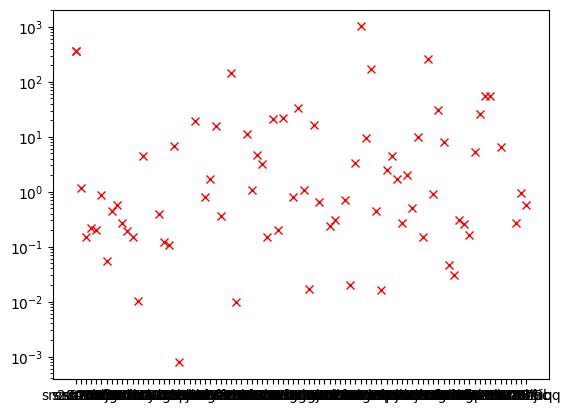

In [6]:
plt.plot(df_fit['F99']/df_sim['F99'], 'rx')
plt.yscale("log")
plt.show()

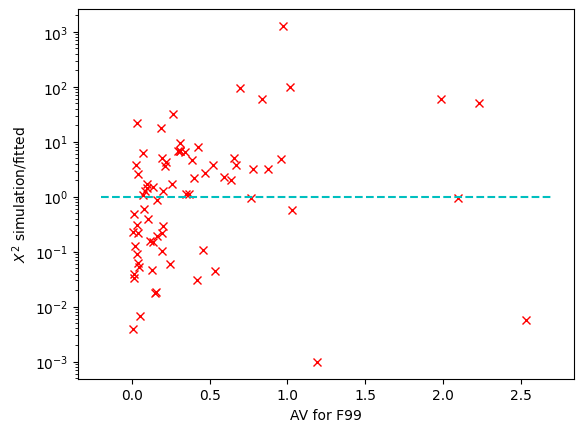

In [7]:
for supernova_name in supernovae_names:
    if supernova_name == "sn2006hb":
        continue
        
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    z = meta['REDSHIFT_FINAL']
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        AV1 = samplesSummary.loc['AV[0]', 'mean']
        chi_sim = df_sim.at[supernova_name, dust_law]
        chi_fit = df_fit.at[supernova_name, dust_law]
    except FileNotFoundError:
        continue
    
    
    plt.plot(AV1, chi_sim/chi_fit, f'rx')
    
plt.plot([-0.2,2.7], [1,1], 'c--')
plt.yscale("log")
plt.xlabel('AV for F99')
plt.ylabel(f"$X^2$ simulation/fitted")
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/chisquaredsimvsfit"+".png", bbox_inches='tight') 
plt.show()